# Import Library

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.feature_selection import chi2, RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Load the Data

In [3]:
colorectal_df = pd.read_csv('../../../DEG/New/colorectal_ml_data_lfc.csv')

In [4]:
colorectal_df

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at,sample_type
0,3.961224,3.525653,4.091227,3.811626,3.549324,11.535893,12.238765,4.841666,7.829440,4.656073,...,6.741569,5.068841,5.715088,9.303970,6.956112,3.057794,2.083697,8.287012,2.536826,Mucosa
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182,Mucosa
2,2.915041,3.344269,4.736746,2.556401,5.618344,11.352166,12.378740,5.376771,6.990490,5.228995,...,7.939907,8.502685,6.735144,8.697731,10.182467,10.466810,9.071230,2.764370,2.954533,Mucosa
3,4.619689,3.758475,3.861172,3.595169,3.974721,10.968717,12.480088,4.561874,6.908015,4.668323,...,7.004064,4.596727,5.208766,4.885240,7.476517,3.048054,2.269150,7.833188,9.360527,Mucosa
4,4.173030,3.124475,4.084866,2.952316,4.199110,10.728334,12.545863,4.664203,7.205106,4.689223,...,6.957954,5.230019,3.299203,8.718398,9.411712,9.604081,7.674544,7.982482,3.562634,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183,Tumor
242,9.072294,8.660195,7.103051,7.318572,7.238546,3.182021,10.253128,9.827421,2.881668,7.167934,...,8.174446,5.976072,7.827573,9.847743,10.736953,2.480961,1.999230,1.970573,2.255261,Tumor
243,9.086258,7.229068,5.881465,7.999610,7.137488,2.663260,10.493696,8.703273,2.174059,6.562482,...,3.690160,7.014529,8.492737,6.280359,2.605201,9.853237,8.138803,9.500060,3.098058,Tumor
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845,Tumor


# Separate the Data into Target and Feature Variable

In [5]:
X=colorectal_df.iloc[:,0:-1]
y=colorectal_df.iloc[:,-1]

In [6]:
y

0      Mucosa
1      Mucosa
2      Mucosa
3      Mucosa
4      Mucosa
        ...  
241     Tumor
242     Tumor
243     Tumor
244     Tumor
245     Tumor
Name: sample_type, Length: 246, dtype: object

# Encode Lables

In [7]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [8]:
classes

array([0, 1, 2])

In [9]:
labels

array(['Mucosa', 'Normal', 'Tumor'], dtype=object)

# Data splilting into traning testing and validation sets

In [10]:
# Split data into train, validation, and test sets using stratified sampling
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state = random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state = random_state)

In [11]:
X_train

,11728232_a_at,11735833_a_at,11719434_a_at,11728234_a_at,11739128_a_at,11732838_at,11715637_a_at,11721993_at,11733581_a_at,11750604_a_at,...,11746954_s_at,11760258_x_at,11718132_at,11720251_at,11724799_x_at,11746772_a_at,11757733_s_at,11757857_s_at,11756083_x_at,11715316_x_at
197,7.797289,8.657750,5.529000,6.334844,8.753693,3.305205,10.311467,8.284614,2.866454,6.700208,...,6.080695,5.045083,4.921582,8.888502,5.022032,9.310744,2.894074,2.168256,9.075279,9.818484
201,9.084894,7.850031,7.010344,6.790167,8.273837,3.655921,10.307853,8.223095,2.822097,7.892033,...,5.443581,7.630364,4.801176,8.119707,5.275026,4.358920,2.665073,2.497180,4.882671,3.005642
244,8.579728,7.258460,6.665537,7.643318,8.043958,2.822487,10.722497,7.114207,2.785241,7.222587,...,7.120815,6.729616,4.434155,7.733066,6.064585,3.279052,2.514426,2.358936,5.148906,2.677845
1,4.150849,3.231274,3.652125,2.910643,3.860969,9.388012,12.426268,3.920922,7.616622,4.646544,...,3.625949,7.085075,4.504109,5.510958,6.470764,5.920584,8.721529,7.232058,9.029117,10.496182
193,7.972969,9.186005,8.505547,6.659749,7.839987,3.013364,10.467159,8.180332,3.085692,8.251122,...,2.911480,2.879531,2.988148,9.880858,7.033530,2.381567,3.177422,2.920934,2.153887,2.650424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,8.723016,7.354809,7.717315,7.329348,7.524983,3.261232,10.609555,7.419988,2.618752,6.394095,...,5.260981,9.090034,4.967147,7.106459,4.587652,12.458564,2.597004,2.100963,8.062830,3.083489
241,8.333105,6.619276,6.593062,6.638163,8.005932,3.504068,10.144328,8.258466,2.906895,6.224321,...,5.847487,8.684000,4.942923,8.172055,4.783011,10.513071,2.629745,2.140094,8.722915,10.524183
159,8.159823,9.739355,7.506296,6.282101,8.678580,2.781816,10.446509,8.524104,2.970882,7.078129,...,4.015561,5.043604,4.805392,3.198002,5.340898,6.685070,2.329299,2.599321,4.870298,3.641333
166,8.722603,5.988202,6.014926,6.494509,6.334723,6.951741,11.907275,6.745460,3.759767,5.977971,...,3.826198,7.130622,5.464048,5.335154,9.583354,10.431166,2.988668,2.297318,2.218094,10.528625


In [12]:
y_train

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2])

In [13]:
# Count occurrences of each class label in y_train
class_counts = np.bincount(y_train)

# Map counts to original class labels
for i, count in enumerate(class_counts):
    print(f"Number of {labels[i]} samples: {count}")


Number of Mucosa samples: 30
Number of Normal samples: 58
Number of Tumor samples: 59


In [14]:
y_train

array([2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0,
       1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2])

In [15]:
# Standardize the data using Z-score normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

In [16]:
X_train_norm

array([[ 0.7414047 ,  1.33695498,  0.20063   , ..., -0.75837937,
         1.40209337,  1.35875964],
       [ 1.24777154,  1.01400903,  1.09309159, ..., -0.64934201,
        -0.00191783, -0.61570294],
       [ 1.04910855,  0.77748449,  0.88535667, ..., -0.6951696 ,
         0.08723856, -0.71070343],
       ...,
       [ 0.88397594,  1.76940735,  1.3918866 , ..., -0.61548239,
        -0.0060613 , -0.43147036],
       [ 1.10529591,  0.26960381,  0.49338497, ..., -0.7155957 ,
        -0.89422542,  1.56456934],
       [ 0.95641737,  0.80642106,  1.40241533, ..., -0.70215093,
        -0.95019277, -0.51223269]])

# Feature Selection Methods

In [51]:
# Feature selection using different methods
n_features_to_select = 200  # Number of top features to select

# SelectKBest with ANOVA F-value
selector_f_classif = SelectKBest(f_classif, k=n_features_to_select)
selector_f_classif.fit(X_train_norm, y_train)
selected_features_f_classif = X_train.columns[selector_f_classif.get_support()]

# ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train_norm, y_train)
feature_importances_etc = etc.feature_importances_
selected_features_etc = X_train.columns[feature_importances_etc.argsort()[::-1][:n_features_to_select]]

# Combine the selected features from different methods
selected_features_ensemble = list(set(selected_features_f_classif) & set(selected_features_etc))

# Print the selected features from the ensemble approach
print("Selected Features (Ensemble):", selected_features_ensemble)

# Train the models with the ensemble-selected features
X_train_ensemble = X_train_norm[:, [X_train.columns.get_loc(feat) for feat in selected_features_ensemble]]
X_test_ensemble = X_test_norm[:, [X_test.columns.get_loc(feat) for feat in selected_features_ensemble]]
X_val_ensemble = X_val_norm[:, [X_val.columns.get_loc(feat) for feat in selected_features_ensemble]]

Selected Features (Ensemble): ['11721561_a_at', '11726884_a_at', '11718816_a_at', '11742188_a_at', '11727143_x_at', '11758083_s_at', '11746322_x_at', '11727553_a_at', '11743656_a_at', '11749586_x_at', '11743468_at', '11734319_a_at', '11744099_a_at', '11750517_x_at', '11728234_a_at', '11735331_a_at', '11739036_a_at', '11743172_a_at', '11728998_x_at', '11734320_a_at', '11715228_s_at', '11748513_x_at', '11720105_a_at', '11739128_a_at', '11722995_at', '11732700_x_at', '11733581_a_at', '11731957_at', '11726289_at', '11741668_x_at', '11749300_x_at', '11746928_a_at', '11729583_x_at', '11743657_x_at', '11717833_a_at', '11725771_at', '11735214_a_at', '11759464_at', '11749164_a_at', '11724537_a_at']


In [85]:
df = pd.read_csv('../../../colorectal_annot.csv')

In [87]:
import pandas as pd

# Read the file into a DataFrame
#df = pd.read_csv('file_with_probe_ids_and_gene_symbols.txt', sep='\t', header=None, names=['ID', 'Gene.Symbol'])
df = pd.read_csv('../../../colorectal_annot.csv')

# Create a list of selected features
selected_features = selected_features_ensemble

# Filter the DataFrame to include only the selected features
selected_features_df = df[df['ID'].isin(selected_features)]

# Print the selected features and their gene symbols
print(selected_features_df)

                ID Gene.Symbol
5    11728234_a_at       CLDN1
7    11739128_a_at        CDH3
11   11733581_a_at         CA7
14     11759464_at       OTOP2
16   11742188_a_at      SLC4A4
25   11746928_a_at        ENC1
26   11729583_x_at         CA1
31   11748513_x_at        HPGD
33   11734320_a_at     SLC17A4
43   11750517_x_at        HPGD
48   11758083_s_at        HPGD
49     11731957_at      GUCA2A
52   11749164_a_at     TMEM206
53     11743468_at        DKC1
55   11728998_x_at       GCNT2
57   11735331_a_at     RUNDC3B
62   11715228_s_at     OSTBETA
68   11743656_a_at        HPGD
71   11743172_a_at     SLCO4A1
72   11717833_a_at       TEX10
73   11718816_a_at       PLCD1
78   11727143_x_at     EPB41L3
80   11732700_x_at        PKIB
87   11727553_a_at        PKIB
89   11746322_x_at       ADH1B
98   11743657_x_at        HPGD
103  11749586_x_at     FAM82A1
131    11726289_at      GRAMD3
136  11726884_a_at        LDHD
138    11722995_at       ADH1B
141  11734319_a_at     SLC17A4
161    1

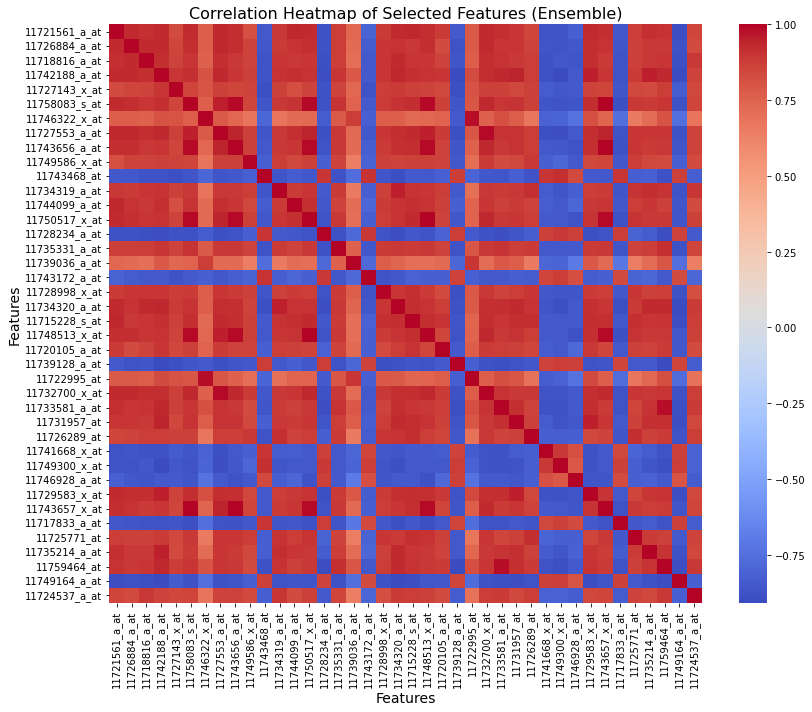

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the selected features
selected_features_df = X_train[selected_features_ensemble]

# Compute the correlation matrix
corr_matrix = selected_features_df.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
ax.set_title('Correlation Heatmap of Selected Features (Ensemble)', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

plt.tight_layout()
plt.show()

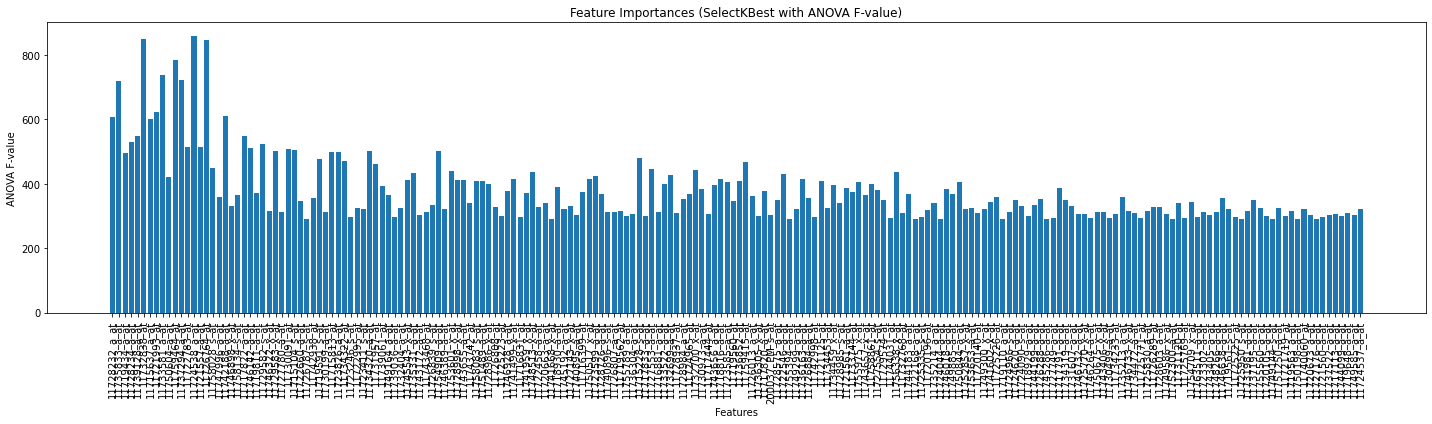

In [54]:
import matplotlib.pyplot as plt

# Get the scores of the selected features from SelectKBest
scores_f_classif = selector_f_classif.scores_[selector_f_classif.get_support()]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the scores
ax.bar(range(len(selected_features_f_classif)), scores_f_classif, align='center')
ax.set_xticks(range(len(selected_features_f_classif)))
ax.set_xticklabels(selected_features_f_classif, rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('ANOVA F-value')
ax.set_title('Feature Importances (SelectKBest with ANOVA F-value)')

plt.tight_layout()
plt.show()

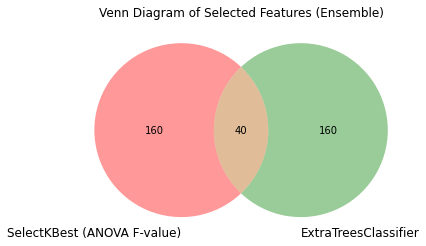

In [55]:
import matplotlib_venn as venn

# Convert the selected features to sets
set_f_classif = set(selected_features_f_classif)
set_etc = set(selected_features_etc)

# Create the Venn diagram
venn.venn2([set_f_classif, set_etc], set_labels=('SelectKBest (ANOVA F-value)', 'ExtraTreesClassifier'))

# Add a title
plt.title('Venn Diagram of Selected Features (Ensemble)')

# Show the plot
plt.show()

In [56]:
pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Model Traning

# Random Forest

In [57]:
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
cv_scores_rf = cross_val_score(rf_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Random Forest Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_rf)))
rf_clf.fit(X_train_ensemble, y_train)


Random Forest Mean cross-validation accuracy: 0.97


RandomForestClassifier(max_depth=10, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



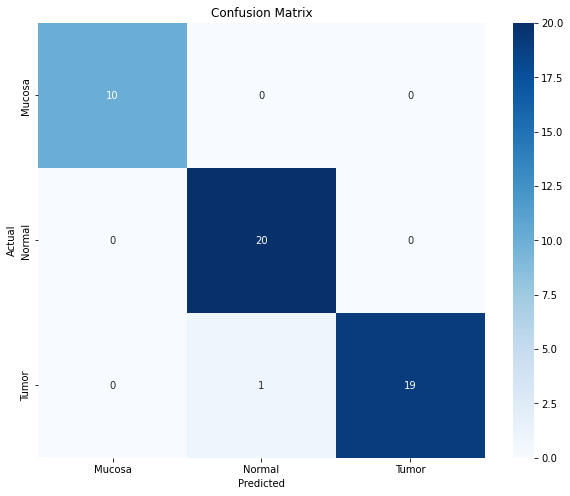

In [58]:
# Evaluate the model performance on the test set
y_pred = rf_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Evaluate the model performance on the validation set
y_pred_val_rf = rf_clf.predict(X_val_ensemble)

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
balanced_accuracy_val_rf = balanced_accuracy_score(y_val, y_pred_val_rf)
f1_val_rf = f1_score(y_val, y_pred_val_rf, average='macro')
precision_val_rf = precision_score(y_val, y_pred_val_rf, average='macro')
recall_val_rf = recall_score(y_val, y_pred_val_rf, average='macro')

print("\nRandom Forest Validation Metrics:")
print(f'Accuracy: {accuracy_val_rf:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_rf:.2f}')
print(f'F1-score: {f1_val_rf:.2f}')
print(f'Precision: {precision_val_rf:.2f}')
print(f'Recall: {recall_val_rf:.2f}')


Random Forest Validation Metrics:
Accuracy: 0.94
Balanced Accuracy: 0.93
F1-score: 0.94
Precision: 0.95
Recall: 0.93


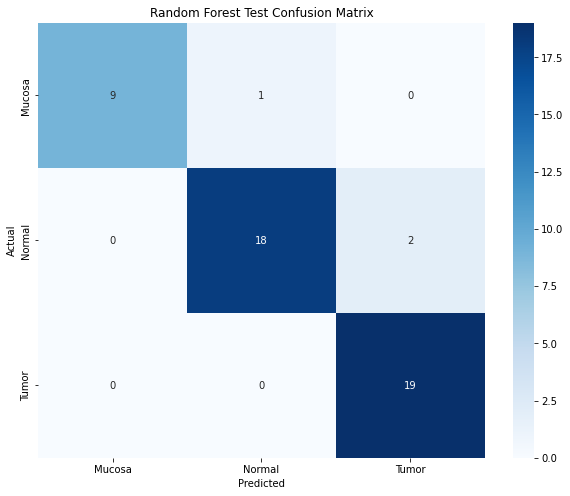

In [60]:
# Plot the confusion matrix
cm_test_rf = confusion_matrix(y_val, y_pred_val_rf)
cm_df_test_rf = pd.DataFrame(cm_test_rf, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_test_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine

In [61]:
# Train the SVM classifier with the selected features
svm_clf = SVC(kernel='rbf', C=1, random_state=42)
cv_scores_svm = cross_val_score(svm_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("SVM Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_svm)))
svm_clf.fit(X_train_ensemble,y_train)


SVM Mean cross-validation accuracy: 0.98


SVC(C=1, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



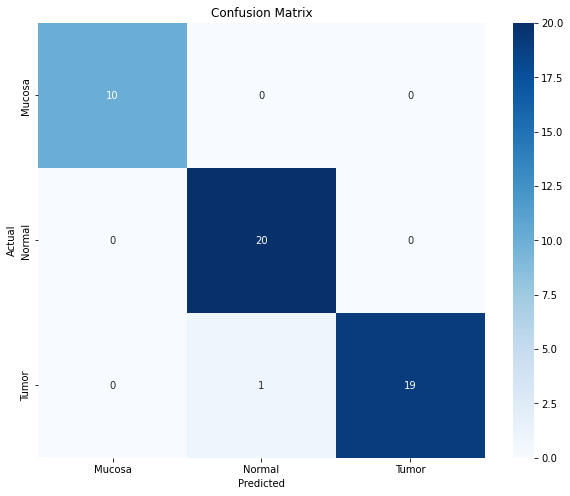

In [62]:
# Evaluate the model performance on the test set
y_pred = svm_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
y_pred_val_svm = svm_clf.predict(X_val_ensemble)
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
balanced_accuracy_val_svm = balanced_accuracy_score(y_val, y_pred_val_svm)
f1_val_svm = f1_score(y_val, y_pred_val_svm, average='macro')
precision_val_svm = precision_score(y_val, y_pred_val_svm, average='macro')
recall_val_svm = recall_score(y_val, y_pred_val_svm, average='macro')
print("\nSVM Validation Metrics:")
print(f'Accuracy: {accuracy_val_svm:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy_val_svm:.2f}')
print(f'F1-score: {f1_val_svm:.2f}')
print(f'Precision: {precision_val_svm:.2f}')
print(f'Recall: {recall_val_svm:.2f}')


SVM Validation Metrics:
Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95


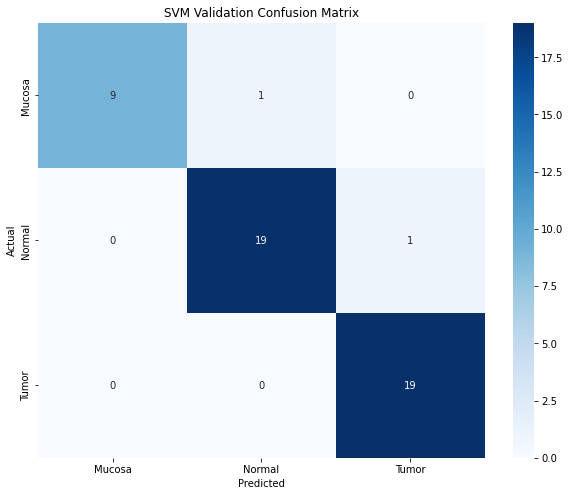

In [64]:
# Plot the confusion matrix for validation set
cm_val_svm = confusion_matrix(y_val, y_pred_val_svm)
cm_df_val_svm = pd.DataFrame(cm_val_svm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val_svm, annot=True, cmap='Blues', fmt='g')
plt.title('SVM Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_clf = LogisticRegression(random_state=42)
cv_scores_lr = cross_val_score(lr_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_lr)))
lr_clf.fit(X_train_ensemble, y_train)

Logistic Regression Mean cross-validation accuracy: 0.99


LogisticRegression(random_state=42)

Accuracy: 1.00
Balanced Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       1.00      1.00      1.00        20
       Tumor       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



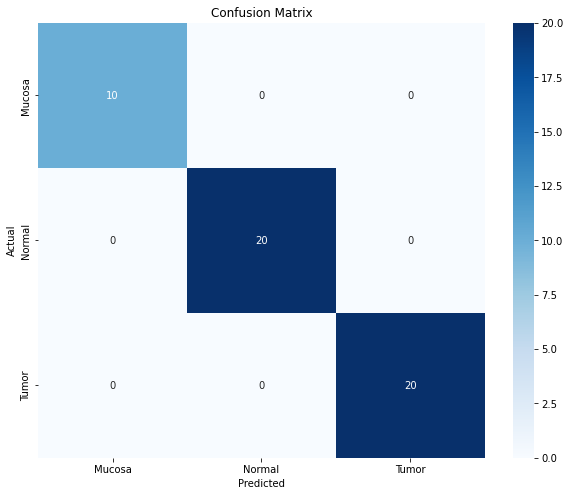

In [66]:
# Evaluate the model performance on the test set
y_pred_lr = lr_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_lr)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, average='macro')
precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_lr, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
# For LR
y_val_pred_lr = lr_clf.predict(X_val_ensemble)
accuracy_val_lr = accuracy_score(y_val, y_val_pred_lr)
print("Accuracy of LR on validation set:", accuracy_val_lr)

Accuracy of LR on validation set: 0.9795918367346939


# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_clf = KNeighborsClassifier()
cv_scores_knn = cross_val_score(knn_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("KNN Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_knn)))
knn_clf.fit(X_train_ensemble, y_train)

KNN Mean cross-validation accuracy: 0.97


KNeighborsClassifier()

Accuracy: 0.96
Balanced Accuracy: 0.95
F1-score: 0.96
Precision: 0.97
Recall: 0.95

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      0.90      0.95        10
      Normal       0.91      1.00      0.95        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



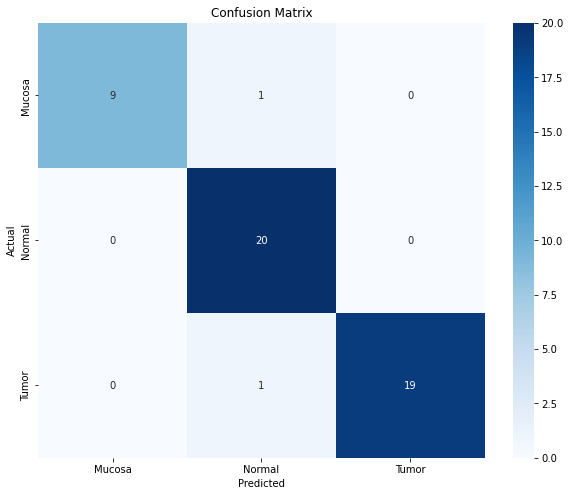

In [69]:
# Evaluate the model performance on the test set
y_pred_knn = knn_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_knn)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='macro')
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_knn, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
# For KNN
y_val_pred_knn = knn_clf.predict(X_val_ensemble)
accuracy_val_knn = accuracy_score(y_val, y_val_pred_knn)
print("Accuracy of LR on validation set:", accuracy_val_knn)

Accuracy of LR on validation set: 0.9795918367346939


# XGBoost

In [71]:
# Train XGBoost
xgb_clf = XGBClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 100, random_state=42)
cv_scores_xgb = cross_val_score(xgb_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("XGBoost Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_xgb)))
xgb_clf.fit(X_train_ensemble, y_train)

XGBoost Mean cross-validation accuracy: 0.95


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



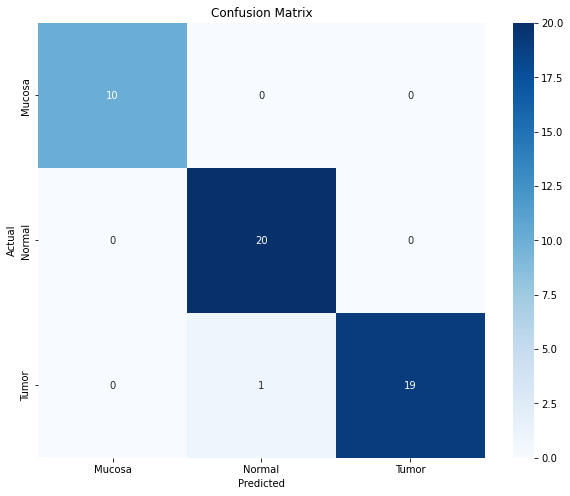

In [72]:
# Evaluate the model performance on the test set
y_pred_xgb = xgb_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_xgb)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='macro')
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_xgb, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
# For XGB
y_val_pred_xgb = xgb_clf.predict(X_val_ensemble)
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("Accuracy of LR on validation set:", accuracy_val_xgb)

Accuracy of LR on validation set: 0.9795918367346939


#  Multi-Layer Perceptron (MLP)

In [74]:
from sklearn.neural_network import MLPClassifier

# Train MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
cv_scores_mlp = cross_val_score(mlp_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("MLP Mean cross-validation accuracy: {:.2f}".format(np.mean(cv_scores_mlp)))
mlp_clf.fit(X_train_ensemble, y_train)

MLP Mean cross-validation accuracy: 0.99


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

Accuracy: 0.98
Balanced Accuracy: 0.98
F1-score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
               precision    recall  f1-score   support

      Mucosa       1.00      1.00      1.00        10
      Normal       0.95      1.00      0.98        20
       Tumor       1.00      0.95      0.97        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



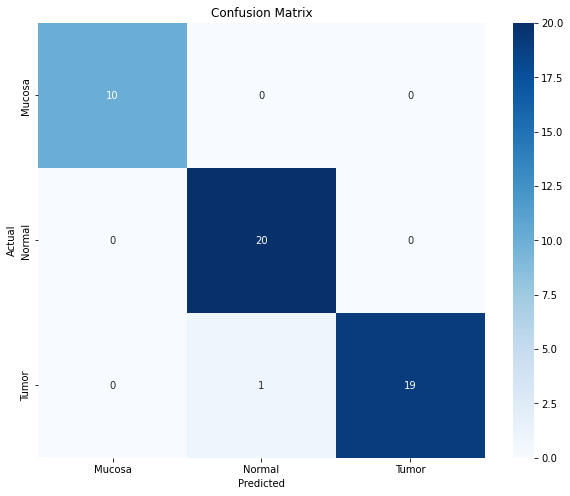

In [75]:
# Evaluate the model performance on the test set
y_pred_mlp = mlp_clf.predict(X_test_ensemble)

accuracy = accuracy_score(y_test, y_pred_mlp)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp, average='macro')
precision = precision_score(y_test, y_pred_mlp, average='macro')
recall = recall_score(y_test, y_pred_mlp, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred_mlp, target_names=labels)
print('\nClassification Report:\n', report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
# For MLP
y_val_pred_mlp = mlp_clf.predict(X_val_ensemble)
accuracy_val_mlp = accuracy_score(y_val, y_val_pred_mlp)
print("Accuracy of LR on validation set:", accuracy_val_mlp)

Accuracy of LR on validation set: 0.9795918367346939


# PCA Plot of the Data

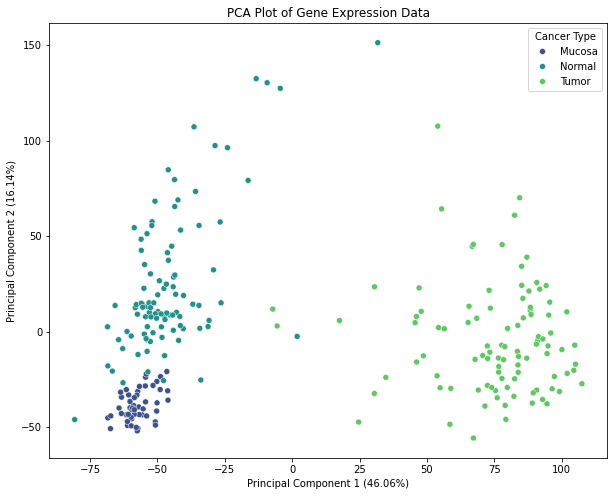

In [77]:
# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target labels to the DataFrame
pca_df['cancer_type'] = y

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cancer_type', data=pca_df, palette='viridis')
plt.title('PCA Plot of Gene Expression Data')
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.legend(title='Cancer Type')
plt.show()


# Cross validation

In [78]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf_scores = cross_val_score(rf_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score: {:.2f}".format(np.mean(rf_scores)))

# SVM 
svm_scores = cross_val_score(svm_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Cross-Validation Score: {:.2f}".format(np.mean(svm_scores)))

# Logistic Regression
lr_scores = cross_val_score(lr_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Logistic Regression Mean Cross-Validation Score: {:.2f}".format(np.mean(lr_scores)))

# KNN
knn_scores = cross_val_score(knn_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("KNN Cross-Validation Scores:", knn_scores)
print("KNN Mean Cross-Validation Score: {:.2f}".format(np.mean(knn_scores)))

# XGBoost
xgb_scores = cross_val_score(xgb_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores:", xgb_scores)
print("XGBoost Mean Cross-Validation Score: {:.2f}".format(np.mean(xgb_scores)))

# MLP
mlp_scores = cross_val_score(mlp_clf, X_train_ensemble, y_train, cv=5, scoring='accuracy')
print("MLP Cross-Validation Scores:", mlp_scores)
print("MLP Mean Cross-Validation Score: {:.2f}".format(np.mean(mlp_scores)))

Random Forest Cross-Validation Scores: [1.         0.9        0.96551724 1.         0.96551724]
Random Forest Mean Cross-Validation Score: 0.97
SVM Cross-Validation Scores: [1.         0.93333333 1.         1.         0.96551724]
SVM Mean Cross-Validation Score: 0.98
Logistic Regression Cross-Validation Scores: [1.         0.93333333 1.         1.         1.        ]
Logistic Regression Mean Cross-Validation Score: 0.99
KNN Cross-Validation Scores: [0.96666667 0.93333333 0.96551724 1.         0.96551724]
KNN Mean Cross-Validation Score: 0.97
XGBoost Cross-Validation Scores: [0.96666667 0.93333333 0.96551724 0.96551724 0.93103448]
XGBoost Mean Cross-Validation Score: 0.95
MLP Cross-Validation Scores: [1.         0.93333333 1.         1.         1.        ]
MLP Mean Cross-Validation Score: 0.99


Top 10 most important features for Random Forest:
          Feature  Importance
26  11733581_a_at    0.056173
33  11743657_x_at    0.054918
18  11728998_x_at    0.054672
13  11750517_x_at    0.054229
31  11746928_a_at    0.053465
21  11748513_x_at    0.049134
27    11731957_at    0.047055
24    11722995_at    0.045394
23  11739128_a_at    0.044043
17  11743172_a_at    0.041996


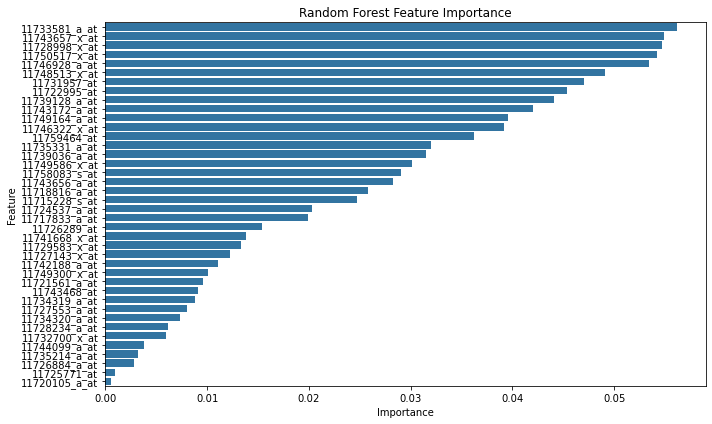

In [79]:
# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame with features and their importance scores
feature_importance_df = pd.DataFrame({'Feature': selected_features_ensemble, 'Importance': feature_importances})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 most important features for Random Forest:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()